# 📊 Marmara Bölgesi Ağustos 2024 Hava Kirliliği Analizi 🌫️
### Harita Mühendisi Gizem Eyi


Çevre ve Şehircilik Bakanlığı'ndan temin edilen Marmara Bölgesi'ne ait Ağustos 2024 PM2.5 değerleri kullanılarak, sadece yapay zeka ve Python programlama dili ile hava kirliliği haritası oluşturma çalışması yapılmıştır. Bu proje, GIS ve CAD yazılımları kullanmadan yapay zeka destekli analizlerin gücünü göstermektedir.

1. Adım
- İllerin koordinatlarını içeren .json dosyası ile Marmara Bölgesi PM 2.5 değerlerini içeren .csv dosyası "il isimlerine" göre birleştirilerek yeni bir .csv dosyası oluşturuldu.
- Yeni oluşturulan .csv dosyası yazılımda okundu.
- Not: ilk deneme olduğu için bazı işlemler tekrarlanmış olabilir.

In [ ]:
from google.colab import files
import pandas as pd
import json

# CSV dosyasını yükle
uploaded_csv = files.upload()

# CSV dosyasının adını al ve DataFrame'e ata
csv_file_path = list(uploaded_csv.keys())[0]
df = pd.read_csv(csv_file_path)

# JSON dosyasını yükle
uploaded_json = files.upload()

# JSON dosyasını oku
json_file_path = list(uploaded_json.keys())[0]
with open(json_file_path) as f:
    json_data = json.load(f)

# CSV dosyasının ilk 5 satırını göster
print(df.head())

# JSON dosyasının ilk birkaç anahtar ve değerini göster
for key in list(json_data.keys())[:5]:
    print(f"{key}: {json_data[key]}")


Saving birlesmis_veri.csv to birlesmis_veri (3).csv


Saving tr-cities-utf8.json to tr-cities-utf8 (2).json
          il  ortalama_pm2.5  plaka     il_adi        lat        lon  \
0  BALIKESİR       10.475500     10  BALIKESİR  39.648369  27.882610   
1    BİLECİK       10.420714     11    BİLECİK  40.150131  29.983061   
2      BURSA       13.934444     16      BURSA  40.182570  29.066870   
3  ÇANAKKALE       13.470714     17  ÇANAKKALE  40.155312  26.414160   
4     EDİRNE       11.017500     22     EDİRNE  41.666667  26.566667   

   northeast_lat  northeast_lon  southwest_lat  southwest_lon  
0      39.693666      27.952410      39.612411      27.838313  
1      40.197617      30.013592      40.106243      29.956657  
2      40.297194      29.211237      40.162997      28.859630  
3      40.199462      26.457106      40.088086      26.378026  
4      41.697939      26.603093      41.649935      26.514059  
type: FeatureCollection
features: [{'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[35.279026031494084, 36.64069366455101

In [ ]:
from google.colab import files
import pandas as pd
import json

# Dosyaları yükle
uploaded_files = files.upload()

# Dosyaların isimlerini al
csv_file_name = [name for name in uploaded_files.keys() if name.endswith('.csv')][0]
json_file_name = [name for name in uploaded_files.keys() if name.endswith('.json')][0]

# CSV dosyasını oku ve ilk birkaç satırı göster
df = pd.read_csv(csv_file_name)
print("CSV Dosyası İçeriği:")
print(df.head())

# JSON dosyasını oku ve ilk birkaç satırı göster
with open(json_file_name) as f:
    json_data = json.load(f)

# JSON verilerini DataFrame'e dönüştür ve ilk birkaç satırı göster
gdf = pd.json_normalize(json_data['features'])
print("\nJSON Dosyası İçeriği:")
print(gdf.head())


Saving birlesmis_veri.csv to birlesmis_veri (4).csv
Saving tr-cities-utf8.json to tr-cities-utf8 (3).json
CSV Dosyası İçeriği:
          il  ortalama_pm2.5  plaka     il_adi        lat        lon  \
0  BALIKESİR       10.475500     10  BALIKESİR  39.648369  27.882610   
1    BİLECİK       10.420714     11    BİLECİK  40.150131  29.983061   
2      BURSA       13.934444     16      BURSA  40.182570  29.066870   
3  ÇANAKKALE       13.470714     17  ÇANAKKALE  40.155312  26.414160   
4     EDİRNE       11.017500     22     EDİRNE  41.666667  26.566667   

   northeast_lat  northeast_lon  southwest_lat  southwest_lon  
0      39.693666      27.952410      39.612411      27.838313  
1      40.197617      30.013592      40.106243      29.956657  
2      40.297194      29.211237      40.162997      28.859630  
3      40.199462      26.457106      40.088086      26.378026  
4      41.697939      26.603093      41.649935      26.514059  

JSON Dosyası İçeriği:
   id     type geometry.type  \
0

In [ ]:
import geopandas as gpd

# JSON dosyasını oku
json_file_name = 'tr-cities-utf8.json'  # JSON dosya adını değiştir
gdf = gpd.read_file(json_file_name)

# JSON dosyasının sütun adlarını kontrol et
print(gdf.columns)


Index(['name', 'geometry'], dtype='object')


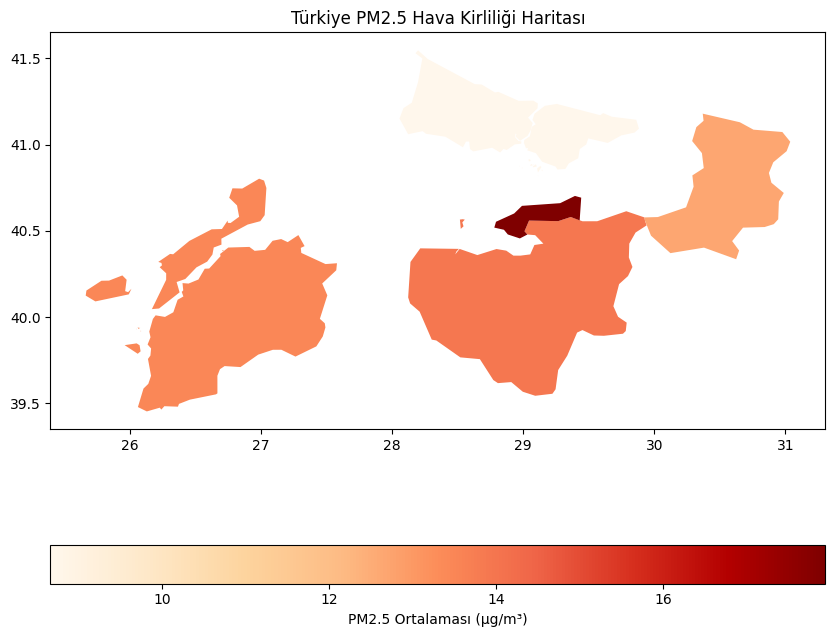

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# CSV dosyasını oku
csv_file_name = 'birlesmis_veri.csv'  # CSV dosya adını değiştir
df = pd.read_csv(csv_file_name)

# JSON dosyasını oku
json_file_name = 'tr-cities-utf8.json'  # JSON dosya adını değiştir
gdf = gpd.read_file(json_file_name)

# CSV'deki 'il_adi' sütununu baş harfi büyük yaparak küçük harfe çevir
df['il_adi'] = df['il_adi'].str.title()

# JSON dosyasındaki uygun sütunları seçin ve adları yeniden adlandırın
gdf = gdf[['name', 'geometry']]
gdf = gdf.rename(columns={'name': 'il_adi'})  # 'name' sütununu 'il_adi' olarak yeniden adlandır

# CSV ve JSON verilerini 'il_adi' sütunu üzerinden birleştir
merged = gdf.merge(df, on='il_adi')

# PM2.5 değerine göre renk skalası belirleyerek haritayı çizdirin
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged.plot(column='ortalama_pm2.5', ax=ax, legend=True, cmap='OrRd',
            legend_kwds={'label': "PM2.5 Ortalaması (µg/m³)",
                         'orientation': "horizontal"})
ax.set_title("Türkiye PM2.5 Hava Kirliliği Haritası")
plt.show()


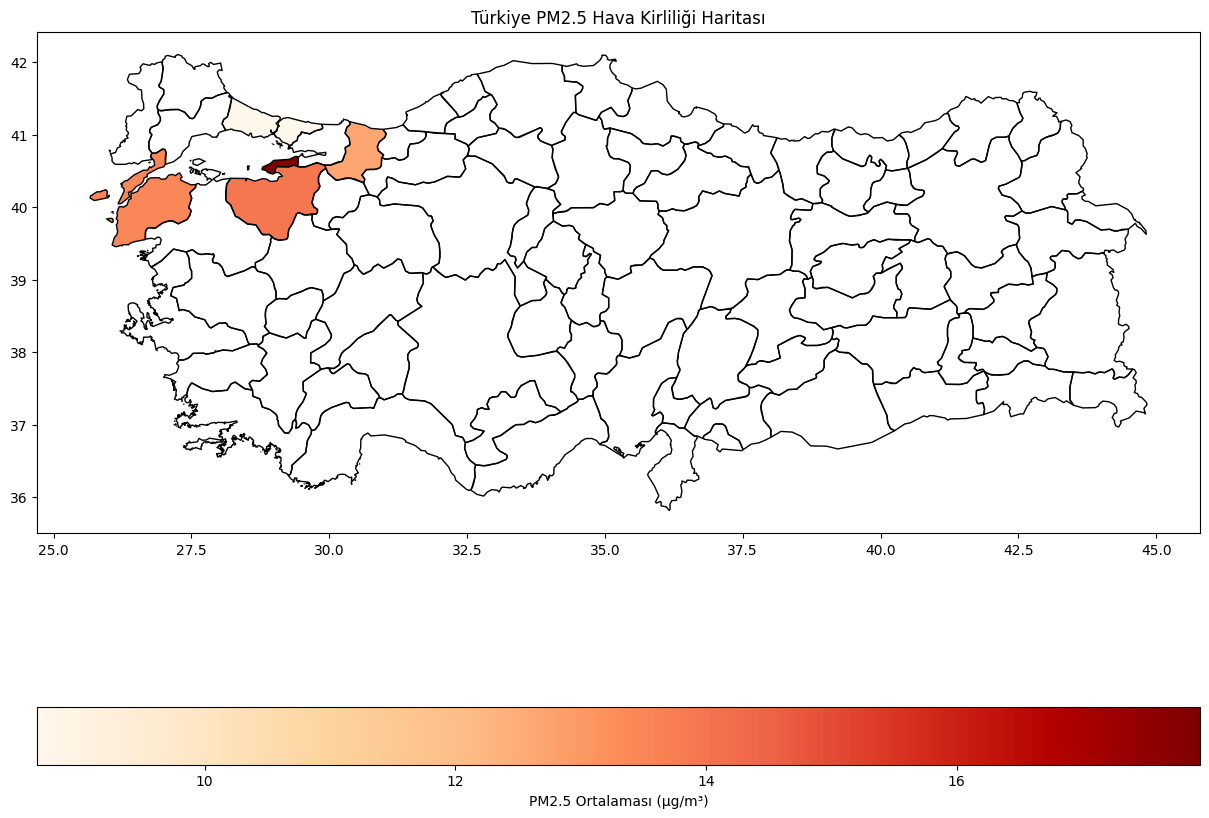

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# CSV dosyasını oku
csv_file_name = 'birlesmis_veri.csv'  # CSV dosya adını değiştir
df = pd.read_csv(csv_file_name)

# JSON dosyasını oku
json_file_name = 'tr-cities-utf8.json'  # JSON dosya adını değiştir
gdf = gpd.read_file(json_file_name)

# CSV'deki 'il_adi' sütununu baş harfi büyük yaparak küçük harfe çevir
df['il_adi'] = df['il_adi'].str.title()

# JSON dosyasındaki uygun sütunları seçin ve adları yeniden adlandırın
gdf = gdf[['name', 'geometry']]
gdf = gdf.rename(columns={'name': 'il_adi'})  # 'name' sütununu 'il_adi' olarak yeniden adlandır

# PM2.5 verisine sahip şehirleri belirle
cities_with_pm25 = df[['il_adi', 'ortalama_pm2.5']]

# Türkiye haritasını çiz
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Türkiye'nin genel haritasını çiz
gdf.boundary.plot(ax=ax, linewidth=1, color='black')

# PM2.5 verisine sahip şehirleri renklendir
gdf_with_pm25 = gdf[gdf['il_adi'].isin(cities_with_pm25['il_adi'])]
gdf_with_pm25 = gdf_with_pm25.merge(cities_with_pm25, on='il_adi')

# Haritayı çizdir
gdf_with_pm25.plot(column='ortalama_pm2.5', ax=ax, legend=True, cmap='OrRd',
                   legend_kwds={'label': "PM2.5 Ortalaması (µg/m³)",
                                'orientation': "horizontal"})

ax.set_title("Türkiye PM2.5 Hava Kirliliği Haritası")
plt.show()


In [ ]:
import pandas as pd
import geopandas as gpd

# CSV dosyasını oku
csv_file_name = 'birlesmis_veri.csv'
df = pd.read_csv(csv_file_name)

# JSON dosyasını oku
json_file_name = 'tr-cities-utf8.json'
gdf = gpd.read_file(json_file_name)

# CSV ve JSON dosyalarındaki şehir isimlerini kontrol et
csv_cities = df['il'].unique()
json_cities = gdf['name'].unique()

print("CSV Şehirleri:", csv_cities)
print("JSON Şehirleri:", json_cities)


CSV Şehirleri: ['BALIKESİR' 'BİLECİK' 'BURSA' 'ÇANAKKALE' 'EDİRNE' 'İSTANBUL' 'KOCAELİ'
 'SAKARYA' 'TEKİRDAĞ' 'YALOVA']
JSON Şehirleri: ['Adana' 'Adıyaman' 'Afyon' 'Ağrı' 'Aksaray' 'Amasya' 'Ankara' 'Antalya'
 'Ardahan' 'Artvin' 'Aydın' 'Balıkesir' 'Bartın' 'Batman' 'Bayburt'
 'Bilecik' 'Bingöl' 'Bitlis' 'Bolu' 'Burdur' 'Bursa' 'Çanakkale' 'Çankırı'
 'Çorum' 'Denizli' 'Diyarbakır' 'Düzce' 'Edirne' 'Elazığ' 'Erzincan'
 'Erzurum' 'Eskişehir' 'Gaziantep' 'Giresun' 'Gümüşhane' 'Hakkari' 'Hatay'
 'Iğdır' 'Isparta' 'İstanbul' 'İzmir' 'Kahramanmaraş' 'Karabük' 'Karaman'
 'Kars' 'Kastamonu' 'Kayseri' 'Kilis' 'Kırıkkale' 'Kırklareli' 'Kırşehir'
 'Kocaeli' 'Konya' 'Kütahya' 'Malatya' 'Manisa' 'Mardin' 'Mersin' 'Muğla'
 'Muş' 'Nevşehir' 'Niğde' 'Ordu' 'Osmaniye' 'Rize' 'Sakarya' 'Samsun'
 'Şanlıurfa' 'Siirt' 'Sinop' 'Şırnak' 'Sivas' 'Tekirdağ' 'Tokat' 'Trabzon'
 'Tunceli' 'Uşak' 'Van' 'Yalova' 'Yozgat' 'Zonguldak']


In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# CSV dosyasını oku
csv_file_name = 'birlesmis_veri.csv'
df = pd.read_csv(csv_file_name)

# JSON dosyasını oku
json_file_name = 'tr-cities-utf8.json'
gdf = gpd.read_file(json_file_name)

# CSV'deki 'il' sütununu küçük harfe çevir ve baş harfi büyük yap
df['il'] = df['il'].str.lower().replace('i', 'ı')

# JSON'daki 'name' sütunundaki isimleri baş harfi büyük yaparak küçük harfe çevir
gdf['name'] = gdf['name'].str.lower().replace('i', 'ı')

# CSV ve JSON'daki şehir isimlerini kontrol et
print("CSV Şehirleri (Düzenlenmiş):", df['il'].unique())
print("JSON Şehirleri (Düzenlenmiş):", gdf['name'].unique())


CSV Şehirleri (Düzenlenmiş): ['balikesi̇r' 'bi̇leci̇k' 'bursa' 'çanakkale' 'edi̇rne' 'i̇stanbul'
 'kocaeli̇' 'sakarya' 'teki̇rdağ' 'yalova']
JSON Şehirleri (Düzenlenmiş): ['adana' 'adıyaman' 'afyon' 'ağrı' 'aksaray' 'amasya' 'ankara' 'antalya'
 'ardahan' 'artvin' 'aydın' 'balıkesir' 'bartın' 'batman' 'bayburt'
 'bilecik' 'bingöl' 'bitlis' 'bolu' 'burdur' 'bursa' 'çanakkale' 'çankırı'
 'çorum' 'denizli' 'diyarbakır' 'düzce' 'edirne' 'elazığ' 'erzincan'
 'erzurum' 'eskişehir' 'gaziantep' 'giresun' 'gümüşhane' 'hakkari' 'hatay'
 'iğdır' 'isparta' 'i̇stanbul' 'i̇zmir' 'kahramanmaraş' 'karabük'
 'karaman' 'kars' 'kastamonu' 'kayseri' 'kilis' 'kırıkkale' 'kırklareli'
 'kırşehir' 'kocaeli' 'konya' 'kütahya' 'malatya' 'manisa' 'mardin'
 'mersin' 'muğla' 'muş' 'nevşehir' 'niğde' 'ordu' 'osmaniye' 'rize'
 'sakarya' 'samsun' 'şanlıurfa' 'siirt' 'sinop' 'şırnak' 'sivas'
 'tekirdağ' 'tokat' 'trabzon' 'tunceli' 'uşak' 'van' 'yalova' 'yozgat'
 'zonguldak']


2. Adım
- geopandas kullanarak harita oluşturmak için koordinarları içeren .json dosyasına veriler eklendi. Bunun için join işlemi yapıldı (arcgis, qgis gibi yazılımlarda yaptığımız işlemin aynısı).
- İl isimleri aynı formatta olmadığı (büyük-küçük harf, Türkçe-İngilizce kelime) için ilk olarak bunlar düzeltildi. (yine diğer yazılımlarda da join işlemi için uyumlu olmalı)
- Daha sonra Türkiye Haritası çizdirilerek veriler değerlerine göre (lejantta görülmekte değer aralıkları) renklendirildi. (Sadece çalışma alanı için de kullanılabilirdi ben Türkiye Haritasını kullanmayı tercih ettim.)

CSV Şehirleri (Düzeltilmiş): ['balıkesir' 'bilecik' 'bursa' 'çanakkale' 'edirne' 'i̇stanbul' 'kocaeli'
 'sakarya' 'tekirdağ' 'yalova']
JSON Şehirleri (Düzeltilmiş): ['adana' 'adıyaman' 'afyon' 'ağrı' 'aksaray' 'amasya' 'ankara' 'antalya'
 'ardahan' 'artvin' 'aydın' 'balıkesir' 'bartın' 'batman' 'bayburt'
 'bilecik' 'bingöl' 'bitlis' 'bolu' 'burdur' 'bursa' 'çanakkale' 'çankırı'
 'çorum' 'denizli' 'diyarbakır' 'düzce' 'edirne' 'elazığ' 'erzincan'
 'erzurum' 'eskişehir' 'gaziantep' 'giresun' 'gümüşhane' 'hakkari' 'hatay'
 'iğdır' 'isparta' 'i̇stanbul' 'i̇zmir' 'kahramanmaraş' 'karabük'
 'karaman' 'kars' 'kastamonu' 'kayseri' 'kilis' 'kırıkkale' 'kırklareli'
 'kırşehir' 'kocaeli' 'konya' 'kütahya' 'malatya' 'manisa' 'mardin'
 'mersin' 'muğla' 'muş' 'nevşehir' 'niğde' 'ordu' 'osmaniye' 'rize'
 'sakarya' 'samsun' 'şanlıurfa' 'siirt' 'sinop' 'şırnak' 'sivas'
 'tekirdağ' 'tokat' 'trabzon' 'tunceli' 'uşak' 'van' 'yalova' 'yozgat'
 'zonguldak']


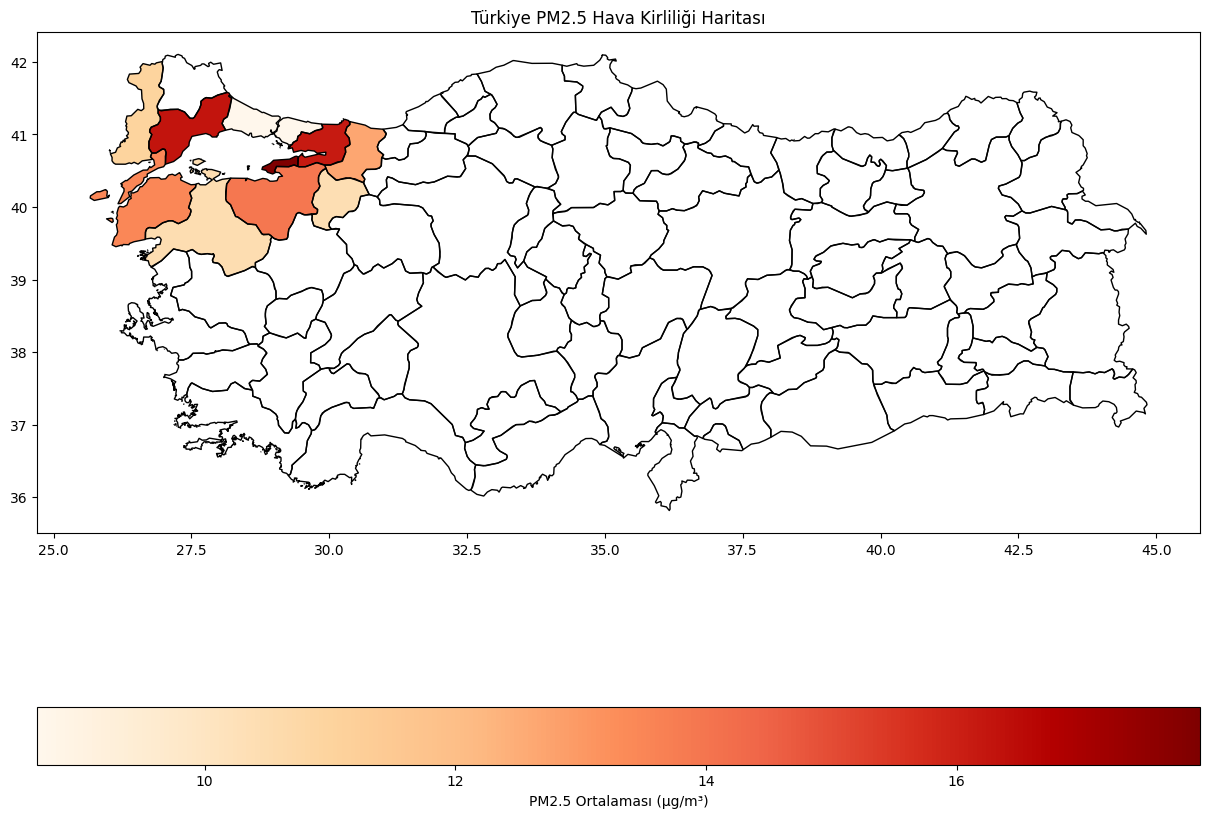

In [ ]:
import pandas as pd
import geopandas as gpd

# CSV dosyasını oku
csv_file_name = 'birlesmis_veri.csv'
df = pd.read_csv(csv_file_name)

# JSON dosyasını oku
json_file_name = 'tr-cities-utf8.json'
gdf = gpd.read_file(json_file_name)

# Şehirlerin eşleşmesini sağlayacak eşleştirme tablosunu oluşturun
manual_mapping = {
    'balikesi̇r': 'balıkesir',
    'bi̇leci̇k': 'bilecik',
    'bursa': 'bursa',
    'çanakkale': 'çanakkale',
    'edi̇rne': 'edirne',
    'i̇stanbul': 'i̇stanbul',
    'kocaeli̇': 'kocaeli',
    'sakarya': 'sakarya',
    'teki̇rdağ': 'tekirdağ',
    'yalova': 'yalova'
}


# CSV'deki 'il_adi' sütunundaki isimleri manuel eşleştirme tablosuna göre düzeltecek bir fonksiyon
def manual_correct_name(name):
    return manual_mapping.get(name.lower(), name)

df['il_adi_corrected'] = df['il_adi'].apply(manual_correct_name)

# JSON'daki 'properties.name' sütununu manuel eşleştirme tablosuna göre düzeltecek bir fonksiyon
gdf['il_adi_corrected'] = gdf['name'].str.lower().apply(lambda x: manual_mapping.get(x, x))

# Eşleşmiş şehirleri kontrol edin
print("CSV Şehirleri (Düzeltilmiş):", df['il_adi_corrected'].unique())
print("JSON Şehirleri (Düzeltilmiş):", gdf['il_adi_corrected'].unique())

# Şehirleri eşleştirme ve harita çizimi için birleştirme
cities_with_pm25 = df[['il_adi_corrected', 'ortalama_pm2.5']]
gdf_with_pm25 = gdf[gdf['il_adi_corrected'].isin(cities_with_pm25['il_adi_corrected'])]
gdf_with_pm25 = gdf_with_pm25.merge(cities_with_pm25, on='il_adi_corrected', how='left')

# Haritayı çiz
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(15, 15))
gdf.boundary.plot(ax=ax, linewidth=1, color='black')  # Türkiye genel sınırları
gdf_with_pm25.plot(column='ortalama_pm2.5', ax=ax, legend=True, cmap='OrRd',
                   legend_kwds={'label': "PM2.5 Ortalaması (µg/m³)",
                                'orientation': "horizontal"})

ax.set_title("Türkiye PM2.5 Hava Kirliliği Haritası")
plt.show()


In [ ]:
print("CSV Şehirleri (Düzeltilmiş):", df[['il_adi', 'il_adi_corrected']].drop_duplicates())
print("JSON Şehirleri (Düzeltilmiş):", gdf[['name', 'il_adi_corrected']].drop_duplicates())


CSV Şehirleri (Düzeltilmiş):       il_adi il_adi_corrected
0  BALIKESİR        balıkesir
1    BİLECİK          bilecik
2      BURSA            bursa
3  ÇANAKKALE        çanakkale
4     EDİRNE           edirne
5   İSTANBUL        i̇stanbul
6    KOCAELİ          kocaeli
7    SAKARYA          sakarya
8   TEKİRDAĞ         tekirdağ
9     YALOVA           yalova
JSON Şehirleri (Düzeltilmiş):          name il_adi_corrected
0       Adana            adana
1    Adıyaman         adıyaman
2       Afyon            afyon
3        Ağrı             ağrı
4     Aksaray          aksaray
..        ...              ...
76       Uşak             uşak
77        Van              van
78     Yalova           yalova
79     Yozgat           yozgat
80  Zonguldak        zonguldak

[81 rows x 2 columns]


3. Adım
- Oluşturulan haritanın görselleştirilmesi.
- Renkler belirledi. (bir kaç deneme var.)
- Kuzey oku eklendi.
- Başlık eklendi.
- Lejant eklendi.
- Not: Arcgis, Qgis gibi yazılımlar kullanılmadan çalışmamıza uygun haritalar oluşturabiliyoruz yazılım dilleri ile. Ben python yazılım dilini tercih ediyorum. Bu çalışmalar bize hem zamandan tasarruf hemde yerden tasarruf sağlamakta. Aynı zamanda biraz daha özenle daha güzel hale getirilebilir haritalar çıkarabiliriz.

<ipython-input-85-e8c530342d30>:58: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  north_arrow = FancyArrowPatch((0.9, 0.9), (0.9, 0.97), transform=ax.transAxes, color='black',


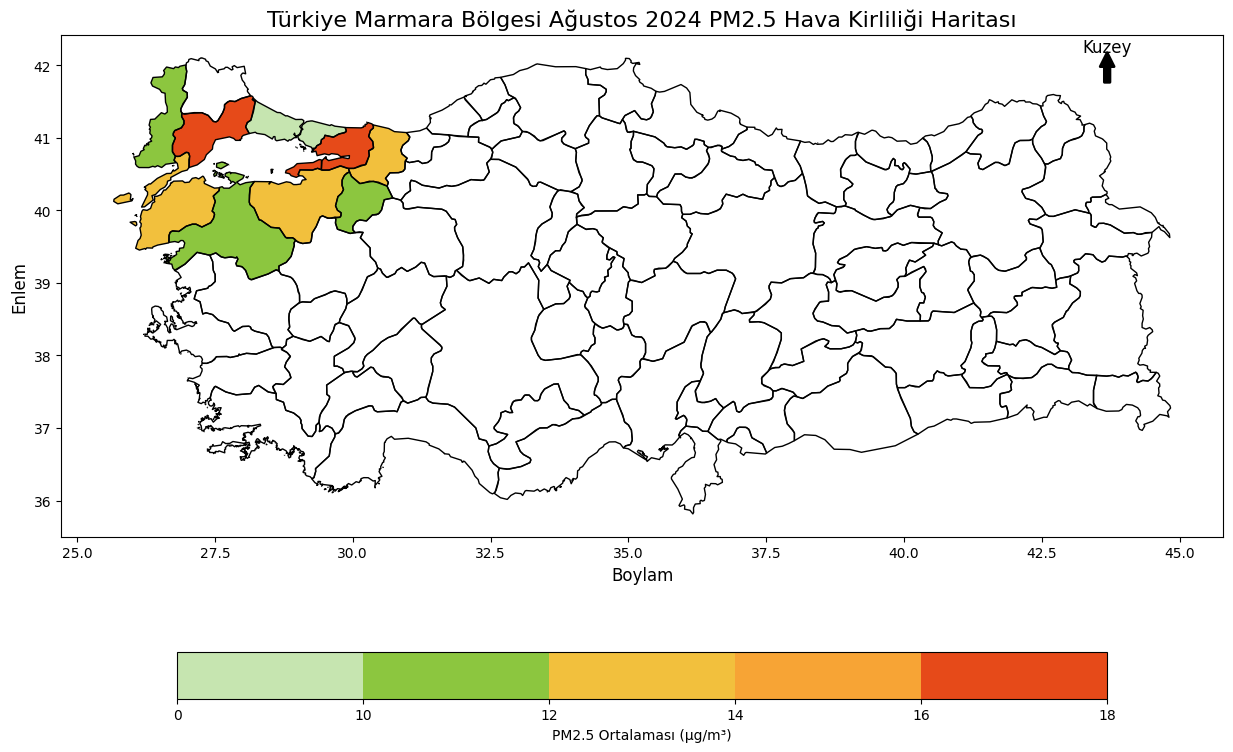

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
# CSV dosyasını oku
csv_file_name = 'birlesmis_veri.csv'
df = pd.read_csv(csv_file_name)

# JSON dosyasını oku
json_file_name = 'tr-cities-utf8.json'
gdf = gpd.read_file(json_file_name)

# Şehirlerin eşleşmesini sağlayacak eşleştirme tablosunu oluşturun
manual_mapping = {
    'balikesi̇r': 'balıkesir',
    'bi̇leci̇k': 'bilecik',
    'bursa': 'bursa',
    'çanakkale': 'çanakkale',
    'edi̇rne': 'edirne',
    'i̇stanbul': 'i̇stanbul',
    'kocaeli̇': 'kocaeli',
    'sakarya': 'sakarya',
    'teki̇rdağ': 'tekirdağ',
    'yalova': 'yalova'
}

# CSV'deki 'il_adi' sütunundaki isimleri manuel eşleştirme tablosuna göre düzeltecek bir fonksiyon
def manual_correct_name(name):
    return manual_mapping.get(name.lower(), name)

df['il_adi_corrected'] = df['il_adi'].apply(lambda x: manual_correct_name(x.lower()))

# JSON'daki 'name' sütununu manuel eşleştirme tablosuna göre düzeltecek bir fonksiyon
gdf['il_adi_corrected'] = gdf['name'].str.lower().apply(lambda x: manual_mapping.get(x, x))

# Şehirleri eşleştirme ve harita çizimi için birleştirme
cities_with_pm25 = df[['il_adi_corrected', 'ortalama_pm2.5']]
gdf_with_pm25 = gdf[gdf['il_adi_corrected'].isin(cities_with_pm25['il_adi_corrected'])]
gdf_with_pm25 = gdf_with_pm25.merge(cities_with_pm25, on='il_adi_corrected', how='left')

# Renk paleti ve norm tanımları
colors = ['#c6e5b0', '#8cc63f', '#f2c03d', '#f7a435', '#e64a19']  # Açık yeşil, yeşil, sarı, turuncu, kırmızı
boundaries = [0, 10, 12, 14, 16, 18]  # Renk geçiş sınırları
cmap = ListedColormap(colors)
norm = BoundaryNorm(boundaries, cmap.N, clip=True)

# Haritayı çiz
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
gdf.boundary.plot(ax=ax, linewidth=1, color='black')  # Türkiye genel sınırları

# PM2.5 değerlerine göre renkli harita
gdf_with_pm25.plot(column='ortalama_pm2.5', ax=ax, legend=True, cmap=cmap, norm=norm,
                   legend_kwds={'label': "PM2.5 Ortalaması (µg/m³)",
                                'orientation': "horizontal",
                                'shrink': 0.8,
                                'pad': 0.1})
# Kuzey okunu ekle
north_arrow = FancyArrowPatch((0.9, 0.9), (0.9, 0.97), transform=ax.transAxes, color='black',
                              arrowstyle='simple', mutation_scale=20, linewidth=2, linestyle='-', edgecolor='black', facecolor='black')
ax.add_patch(north_arrow)
ax.text(0.9, 0.975, 'Kuzey', transform=ax.transAxes, fontsize=12, ha='center', va='center', color='black')

# Başlık ve aksanları ayarla
ax.set_title("Türkiye Marmara Bölgesi Ağustos 2024 PM2.5 Hava Kirliliği Haritası", fontsize=16)
ax.set_xlabel("Boylam", fontsize=12)
ax.set_ylabel("Enlem", fontsize=12)

# Haritayı kaydet
plt.savefig('pm25_harita2.png', dpi=300, bbox_inches='tight')

plt.show()




In [ ]:
# Renk paleti ve norm tanımları
colors = ['#a2c2e5', '#1e77b4', '#d5a6bd', '#a64d79', '#5e2a73']  # Açık mavi, koyu mavi, açık mor, koyu mor, koyu kırmızı
boundaries = [0, 10, 12, 14, 16, 18]  # Renk geçiş sınırları
cmap = ListedColormap(colors)
norm = BoundaryNorm(boundaries, cmap.N, clip=True)

<ipython-input-75-d49353e1cc80>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  north_arrow = FancyArrowPatch((0.9, 0.9), (0.9, 0.97), transform=ax.transAxes, color='black',


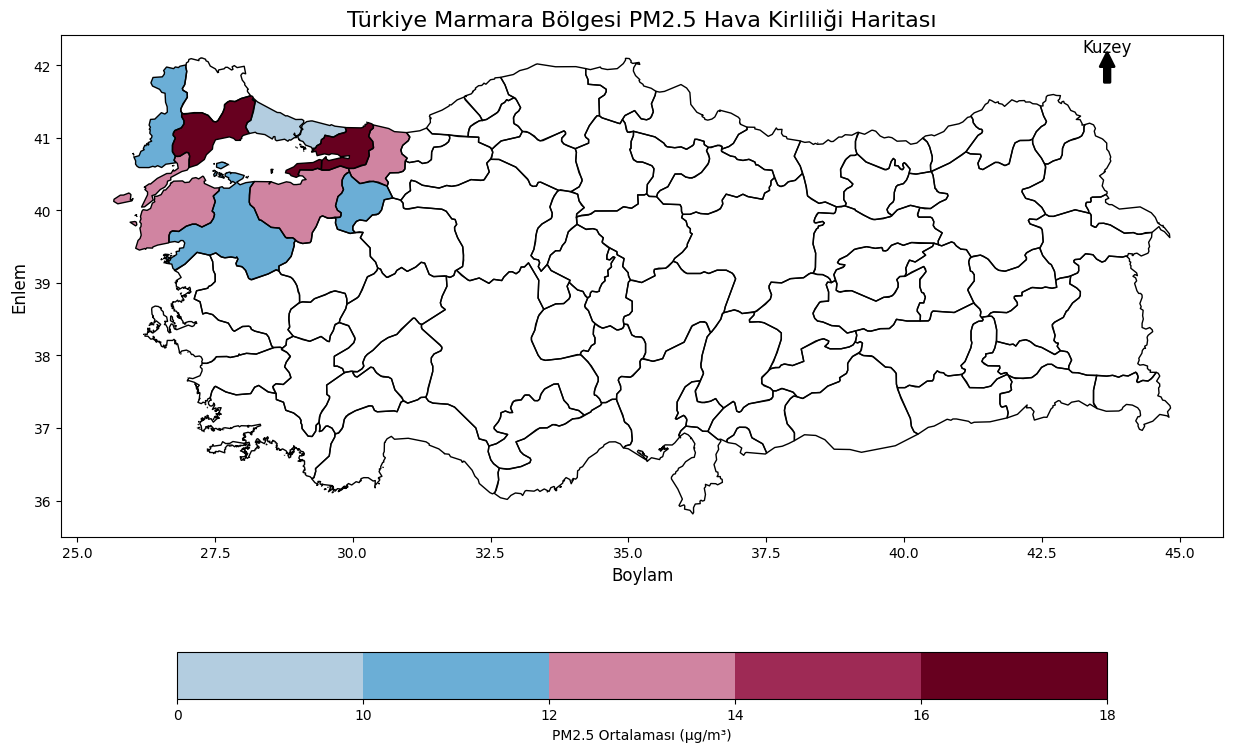

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

# CSV dosyasını oku
csv_file_name = 'birlesmis_veri.csv'
df = pd.read_csv(csv_file_name)

# JSON dosyasını oku
json_file_name = 'tr-cities-utf8.json'
gdf = gpd.read_file(json_file_name)

# Şehirlerin eşleşmesini sağlayacak eşleştirme tablosunu oluşturun
manual_mapping = {
    'balikesi̇r': 'balıkesir',
    'bi̇leci̇k': 'bilecik',
    'bursa': 'bursa',
    'çanakkale': 'çanakkale',
    'edi̇rne': 'edirne',
    'i̇stanbul': 'i̇stanbul',
    'kocaeli̇': 'kocaeli',
    'sakarya': 'sakarya',
    'teki̇rdağ': 'tekirdağ',
    'yalova': 'yalova'
}

# CSV'deki 'il_adi' sütunundaki isimleri manuel eşleştirme tablosuna göre düzeltecek bir fonksiyon
def manual_correct_name(name):
    return manual_mapping.get(name.lower(), name)

df['il_adi_corrected'] = df['il_adi'].apply(lambda x: manual_correct_name(x.lower()))

# JSON'daki 'name' sütununu manuel eşleştirme tablosuna göre düzeltecek bir fonksiyon
gdf['il_adi_corrected'] = gdf['name'].str.lower().apply(lambda x: manual_mapping.get(x, x))

# Şehirleri eşleştirme ve harita çizimi için birleştirme
cities_with_pm25 = df[['il_adi_corrected', 'ortalama_pm2.5']]
gdf_with_pm25 = gdf[gdf['il_adi_corrected'].isin(cities_with_pm25['il_adi_corrected'])]
gdf_with_pm25 = gdf_with_pm25.merge(cities_with_pm25, on='il_adi_corrected', how='left')

# Renk paleti ve norm tanımları
colors = ['#b3cde0', '#6baed6', '#d084a1', '#9e2a55', '#67001f']  # Açık mavi, koyu mavi, açık mor, koyu mor, koyu kırmızı
boundaries = [0, 10, 12, 14, 16, 18]  # Renk geçiş sınırları
cmap = ListedColormap(colors)
norm = BoundaryNorm(boundaries, cmap.N, clip=True)

# Haritayı çiz
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
gdf.boundary.plot(ax=ax, linewidth=1, color='black')  # Türkiye genel sınırları

# PM2.5 değerlerine göre renkli harita
gdf_with_pm25.plot(column='ortalama_pm2.5', ax=ax, legend=True, cmap=cmap, norm=norm,
                   legend_kwds={'label': "PM2.5 Ortalaması (µg/m³)",
                                'orientation': "horizontal",
                                'shrink': 0.8,
                                'pad': 0.1})
# Kuzey okunu ekle
north_arrow = FancyArrowPatch((0.9, 0.9), (0.9, 0.97), transform=ax.transAxes, color='black',
                              arrowstyle='simple', mutation_scale=20, linewidth=2, linestyle='-', edgecolor='black', facecolor='black')
ax.add_patch(north_arrow)
ax.text(0.9, 0.975, 'Kuzey', transform=ax.transAxes, fontsize=12, ha='center', va='center', color='black')

# Başlık ve aksanları ayarla
ax.set_title("Türkiye Marmara Bölgesi PM2.5 Hava Kirliliği Haritası", fontsize=16)
ax.set_xlabel("Boylam", fontsize=12)
ax.set_ylabel("Enlem", fontsize=12)

# Haritayı kaydet
plt.savefig('pm25_harita2.png', dpi=300, bbox_inches='tight')

plt.show()


4. Adım
- Marmara Bölgesi PM2.5 ortalamlarını gösteren grafik.
- Yine bu grafikleri istediğimiz şekilde düzenleyebiliriz.

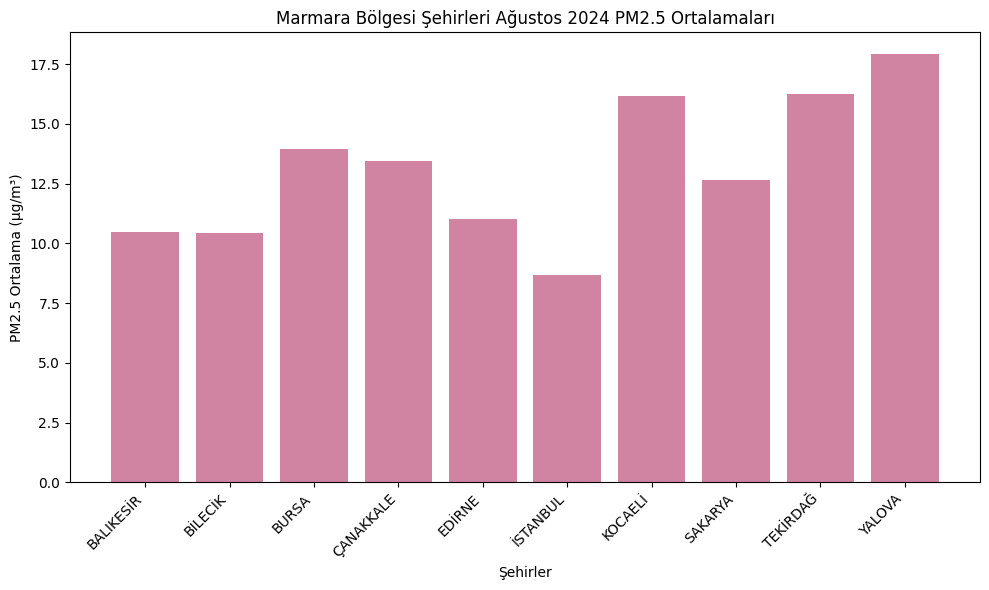

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV dosyasını oku
csv_file_name = 'birlesmis_veri.csv'
df = pd.read_csv(csv_file_name)

# PM2.5 değerlerini içeren çubuk grafiği oluştur
plt.figure(figsize=(10, 6))
plt.bar(df['il_adi'], df['ortalama_pm2.5'], color='#d084a1')
plt.xlabel('Şehirler')
plt.ylabel('PM2.5 Ortalama (µg/m³)')
plt.title('Marmara Bölgesi Şehirleri Ağustos 2024 PM2.5 Ortalamaları')
plt.xticks(rotation=45, ha='right')  # Şehir isimlerini yatay döndür
plt.tight_layout()

# Grafiği kaydet
plt.savefig('pm25_cubuk_grafik_yeni1.png', dpi=300, bbox_inches='tight')

plt.show()
